In [20]:
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import humanize
import matplotlib.pyplot as plt
import matplotlib as mpl

In [21]:
# "VILOCA": "#ff6b6b"

In [22]:
fname_viloca_posterior = "results/distance/performance_measures/performance_mutation_calls_posterior_thres.csv"

In [23]:
df_viloca = pd.read_csv(fname_viloca_posterior).drop(columns=["Unnamed: 0"])

In [24]:
df_viloca['method'].unique()

array(['shorah_default', 'viloca_alpha_0.00001'], dtype=object)

In [25]:
df_viloca = df_viloca[df_viloca['method']=='viloca_alpha_0.00001']

In [26]:
df_long = pd.melt(df_viloca, id_vars=["method", "params", "replicate", "posterior_threshold"]).assign(
        params=lambda x: x["params"].str.replace("_", "\n")
    )


df_long.loc[:, 'seq_tech'] = df_long['params'].str.split('~').str[1].str.split('\n').str[0]

mapping_seqtech = {'illumina': 'Illumina', 
                    'nanopore': 'ONT', 
                  'pacbio': 'PacBio'}

df_long["seq_tech"] = df_long['seq_tech'].apply(lambda x: mapping_seqtech[x])

df_long.loc[:,'coverage'] = df_long['params'].str.split('~').str[6].str.split('_').str[0]

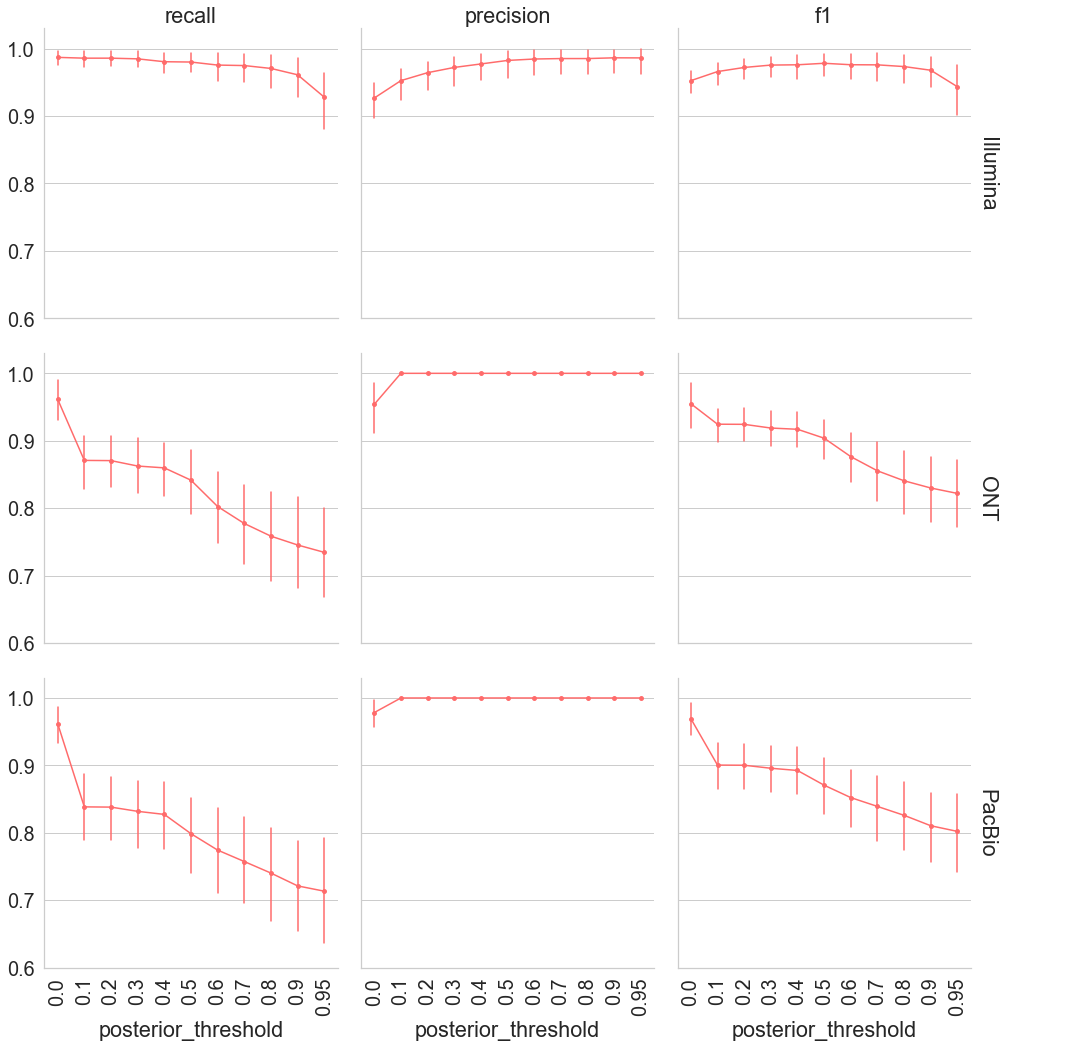

In [31]:
sns.set_theme(style="whitegrid", font_scale=1.8)


g = sns.catplot(
        data=df_long,
        x="posterior_threshold",
        y="value",
        hue="method",
        col="variable",
        col_order=['recall', 'precision', 'f1'],
        #row_order=['illumina', 'nanopore', 'pacbio'],
        row='seq_tech',
        kind="point",
        legend=False, 
        width=0.8,
        linewidth=1.5,
        sharex=True,
        palette=["#ff6b6b"],
        margin_titles=True,
    )
g.set_titles(col_template='{col_name}', row_template='{row_name}')
g.tick_params(axis='x', rotation=90)
g.set(ylim=(0.60, 1.03))
g.set(ylabel ="")
g.add_legend(fontsize=20)
g.tight_layout()

In [32]:
g.savefig("distance__snvs_posteriorxprecisionrecall__supp.pdf")